# Image Modeling using Convolutional Neural Networks

## Imports and Loading the Data

In [139]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras import regularizers

from keras import Input
from matplotlib import image

import random
random.seed(4521)

from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

In [2]:
# Want the vid_id,thumbnail and views from our data
data = pickle.load(open(r"Data\players_cleaned_df.pickle","rb"))

# Pulling out the video_ids to name the file, and corresponding URLs
video_ids = data['vid_id']
urls = data['thumbnail']

In [3]:
# Load all images into a container
images_data = []
for vid in video_ids:
    image_name = r"Images/"+vid+".png"
    current_image = image.imread(image_name,format="jpeg")
    images_data.append(np.asarray(current_image))
# Scaling the image data and converting into array
array_images = np.array(images_data)/255

In [4]:
array_images.shape

(1252, 180, 320, 3)

In [5]:
y = data['views']

In [6]:
# def print_mse(model,X_train,y_train,X_test,y_test):
#     y_preds = model.predict(X_test)
    
    

# Train Test Validation Splits
- Using 80% of the images to train

In [7]:
1252*.2

250.4

In [8]:
X_train, X_test, y_train, y_test = train_test_split(array_images,y,test_size=150,random_state=4521)
X_train_f,X_val,y_train_f,y_val = train_test_split(X_train,y_train,test_size=100,random_state=4521)

In [ ]:
# CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(loss='mse',
              optimizer="adam",
              metrics=['mse'])

history = model.fit(X_train_f,
                    y_train_f,
                    epochs=50,
                    batch_size=10,
                    validation_data=(X_val, y_val))

# Model Fitting

## Model 1

In [16]:
# CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

In [18]:
model.compile(loss='mse',
              optimizer="adam",
              metrics=['mse'])

In [19]:
history = model.fit(X_train_f,
                    y_train_f,
                    epochs=50,
                    batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/100
101/101 [==============================] - 26s 257ms/step - loss: 14563847168.0000 - mse: 14563847168.0000 - val_loss: 11805365248.0000 - val_mse: 11805365248.0000
Epoch 2/100
101/101 [==============================] - 27s 267ms/step - loss: 12142897152.0000 - mse: 12142898176.0000 - val_loss: 12790847488.0000 - val_mse: 12790847488.0000
Epoch 3/100
101/101 [==============================] - 26s 254ms/step - loss: 12036616192.0000 - mse: 12036616192.0000 - val_loss: 12757490688.0000 - val_mse: 12757490688.0000
Epoch 4/100
101/101 [==============================] - 25s 250ms/step - loss: 11912365056.0000 - mse: 11912365056.0000 - val_loss: 12085293056.0000 - val_mse: 12085293056.0000
Epoch 5/100
101/101 [==============================] - 25s 251ms/step - loss: 11623856128.0000 - mse: 11623856128.0000 - val_loss: 11857067008.0000 - val_mse: 11857067008.0000
Epoch 6/100
101/101 [==============================] - 25s 251ms/step - loss: 11737998336.0000 - mse: 11737998336.0000 -

Epoch 94/100
101/101 [==============================] - 25s 245ms/step - loss: 842861312.0000 - mse: 842861312.0000 - val_loss: 12594869248.0000 - val_mse: 12594869248.0000
Epoch 95/100
101/101 [==============================] - 24s 240ms/step - loss: 779788800.0000 - mse: 779788800.0000 - val_loss: 14630264832.0000 - val_mse: 14630264832.0000
Epoch 96/100
101/101 [==============================] - 24s 240ms/step - loss: 695591168.0000 - mse: 695591168.0000 - val_loss: 13034492928.0000 - val_mse: 13034492928.0000
Epoch 97/100
101/101 [==============================] - 24s 241ms/step - loss: 582350720.0000 - mse: 582350720.0000 - val_loss: 13900274688.0000 - val_mse: 13900274688.0000
Epoch 98/100
101/101 [==============================] - 25s 243ms/step - loss: 544478784.0000 - mse: 544478784.0000 - val_loss: 12904411136.0000 - val_mse: 12904411136.0000
Epoch 99/100
101/101 [==============================] - 25s 246ms/step - loss: 483234048.0000 - mse: 483234048.0000 - val_loss: 1359844

## Model 2
- Using "MAE" instead of "MSE"

In [20]:
# CNN
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(32, (4, 4), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(1, activation='linear'))

In [21]:
model2.compile(loss='mae',
              optimizer="adam",
              metrics=['mae'])

In [22]:
history2 = model2.fit(X_train_f,
                    y_train_f,
                    epochs=50,
                    batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/100
101/101 [==============================] - 25s 246ms/step - loss: 64367.3555 - mae: 64367.3555 - val_loss: 57943.7031 - val_mae: 57943.7109
Epoch 2/100
101/101 [==============================] - 25s 245ms/step - loss: 56679.1406 - mae: 56679.1406 - val_loss: 57074.7344 - val_mae: 57074.7344
Epoch 3/100
101/101 [==============================] - 25s 243ms/step - loss: 57717.9492 - mae: 57717.9492 - val_loss: 62525.4219 - val_mae: 62525.4219
Epoch 4/100
101/101 [==============================] - 24s 241ms/step - loss: 55721.4102 - mae: 55721.4102 - val_loss: 55573.8984 - val_mae: 55573.8984
Epoch 5/100
101/101 [==============================] - 24s 240ms/step - loss: 55296.6953 - mae: 55296.6953 - val_loss: 57455.0703 - val_mae: 57455.0703
Epoch 6/100
101/101 [==============================] - 24s 240ms/step - loss: 55419.1016 - mae: 55419.1016 - val_loss: 55503.2812 - val_mae: 55503.2812
Epoch 7/100
101/101 [==============================] - 24s 240ms/step - loss: 55553.1328

## Model 3
- Adding another Convolutional layer and MSE

In [9]:
# CNN
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(32, (4, 4), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(1, activation='linear'))

model3.compile(loss='mse',
              optimizer="adam",
              metrics=['mse'])

In [10]:
history3 = model3.fit(X_train_f,
                    y_train_f,
                    epochs=50,
                    batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/50
101/101 [==============================] - 26s 256ms/step - loss: 14338309120.0000 - mse: 14338309120.0000 - val_loss: 11702084608.0000 - val_mse: 11702084608.0000
Epoch 2/50
101/101 [==============================] - 25s 249ms/step - loss: 11865625600.0000 - mse: 11865625600.0000 - val_loss: 11772146688.0000 - val_mse: 11772146688.0000
Epoch 3/50
101/101 [==============================] - 25s 248ms/step - loss: 11783686144.0000 - mse: 11783687168.0000 - val_loss: 11785452544.0000 - val_mse: 11785452544.0000
Epoch 4/50
101/101 [==============================] - 25s 247ms/step - loss: 11826106368.0000 - mse: 11826106368.0000 - val_loss: 11600834560.0000 - val_mse: 11600834560.0000
Epoch 5/50
101/101 [==============================] - 25s 249ms/step - loss: 11899311104.0000 - mse: 11899311104.0000 - val_loss: 11671079936.0000 - val_mse: 11671079936.0000
Epoch 6/50
101/101 [==============================] - 25s 250ms/step - loss: 12620226560.0000 - mse: 12620226560.0000 - val_l

101/101 [==============================] - 28s 274ms/step - loss: 10735612928.0000 - mse: 10735612928.0000 - val_loss: 11919289344.0000 - val_mse: 11919289344.0000
Epoch 48/50
101/101 [==============================] - 28s 279ms/step - loss: 10672421888.0000 - mse: 10672421888.0000 - val_loss: 12172103680.0000 - val_mse: 12172103680.0000
Epoch 49/50
101/101 [==============================] - 31s 303ms/step - loss: 10388770816.0000 - mse: 10388770816.0000 - val_loss: 12212488192.0000 - val_mse: 12212488192.0000
Epoch 50/50
101/101 [==============================] - 27s 268ms/step - loss: 10254135296.0000 - mse: 10254135296.0000 - val_loss: 14685837312.0000 - val_mse: 14685837312.0000


## Model 4
- Adding another layer with MAE

In [11]:
# CNN
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(32, (4, 4), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(1, activation='linear'))

model4.compile(loss='mae',
              optimizer="adam",
              metrics=['mae'])

In [12]:
history4 = model4.fit(X_train_f,
                    y_train_f,
                    epochs=50,
                    batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/50
101/101 [==============================] - 26s 261ms/step - loss: 66301.0703 - mae: 66301.0703 - val_loss: 56541.1914 - val_mae: 56541.1914
Epoch 2/50
101/101 [==============================] - 27s 263ms/step - loss: 57322.3945 - mae: 57322.3945 - val_loss: 55918.3008 - val_mae: 55918.3008
Epoch 3/50
101/101 [==============================] - 25s 247ms/step - loss: 57180.2266 - mae: 57180.2266 - val_loss: 60277.5742 - val_mae: 60277.5742
Epoch 4/50
101/101 [==============================] - 26s 256ms/step - loss: 55771.6211 - mae: 55771.6211 - val_loss: 57809.0312 - val_mae: 57809.0312
Epoch 5/50
101/101 [==============================] - 27s 264ms/step - loss: 57814.2227 - mae: 57814.2227 - val_loss: 59982.9258 - val_mae: 59982.9258
Epoch 6/50
101/101 [==============================] - 26s 255ms/step - loss: 55645.5078 - mae: 55645.5078 - val_loss: 58216.1133 - val_mae: 58216.1133
Epoch 7/50
101/101 [==============================] - 26s 257ms/step - loss: 55044.1602 - mae:

In [13]:

# Add drop out layers

## Model 5 - Adding Dropout Layer with MSE, and less layers

In [15]:
# CNN
model12 = models.Sequential()
model12.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
model12.add(layers.MaxPooling2D((2, 2)))
model12.add(layers.Dropout(rate=0.1))

model12.add(layers.Conv2D(32, (4, 4), activation='relu'))
model12.add(layers.MaxPooling2D((2, 2)))
model12.add(layers.Dropout(rate=0.1))
            
model12.add(layers.Conv2D(64, (3, 3), activation='relu'))
model12.add(layers.MaxPooling2D((2, 2)))
model12.add(layers.Dropout(rate=0.1))

model12.add(layers.Flatten())
model12.add(layers.Dense(64, activation='relu'))
model12.add(layers.Dense(1, activation='linear'))

In [16]:
model12.compile(loss='mse',
              optimizer="adam",
              metrics=['mse'])

In [17]:
history12 = model12.fit(X_train_f,
                    y_train_f,
                    epochs=50,
                    batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/50
101/101 [==============================] - 28s 277ms/step - loss: 14115635200.0000 - mse: 14115635200.0000 - val_loss: 11972028416.0000 - val_mse: 11972028416.0000
Epoch 2/50
101/101 [==============================] - 28s 279ms/step - loss: 11798967296.0000 - mse: 11798967296.0000 - val_loss: 11762129920.0000 - val_mse: 11762129920.0000
Epoch 3/50
101/101 [==============================] - 27s 267ms/step - loss: 12052582400.0000 - mse: 12052582400.0000 - val_loss: 11642588160.0000 - val_mse: 11642588160.0000
Epoch 4/50
101/101 [==============================] - 27s 267ms/step - loss: 11764082688.0000 - mse: 11764082688.0000 - val_loss: 11659186176.0000 - val_mse: 11659186176.0000
Epoch 5/50
101/101 [==============================] - 28s 274ms/step - loss: 11689312256.0000 - mse: 11689312256.0000 - val_loss: 11653632000.0000 - val_mse: 11653632000.0000
Epoch 6/50
101/101 [==============================] - 30s 293ms/step - loss: 11863959552.0000 - mse: 11863960576.0000 - val_l

Epoch 48/50
101/101 [==============================] - 28s 278ms/step - loss: 3803385856.0000 - mse: 3803385856.0000 - val_loss: 13655225344.0000 - val_mse: 13655225344.0000
Epoch 49/50
101/101 [==============================] - 28s 278ms/step - loss: 4078494976.0000 - mse: 4078494976.0000 - val_loss: 12254777344.0000 - val_mse: 12254777344.0000
Epoch 50/50
101/101 [==============================] - 28s 275ms/step - loss: 3359197696.0000 - mse: 3359197696.0000 - val_loss: 12035598336.0000 - val_mse: 12035598336.0000


In [18]:
# CNN
model21 = models.Sequential()
model21.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
model21.add(layers.MaxPooling2D((2, 2)))
model21.add(layers.Dropout(rate=0.1))

model21.add(layers.Conv2D(32, (4, 4), activation='relu'))
model21.add(layers.MaxPooling2D((2, 2)))
model21.add(layers.Dropout(rate=0.1))

model21.add(layers.Conv2D(64, (3, 3), activation='relu'))
model21.add(layers.MaxPooling2D((2, 2)))
model21.add(layers.Dropout(rate=0.1))

model21.add(layers.Flatten())
model21.add(layers.Dense(64, activation='relu'))
model21.add(layers.Dense(1, activation='linear'))

In [19]:
model21.compile(loss='mae',
              optimizer="adam",
              metrics=['mae'])

In [20]:
history21 = model21.fit(X_train_f,
                    y_train_f,
                    epochs=50,
                    batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/50
101/101 [==============================] - 28s 279ms/step - loss: 66251.4609 - mae: 66251.4609 - val_loss: 56236.4414 - val_mae: 56236.4414
Epoch 2/50
101/101 [==============================] - 28s 278ms/step - loss: 56542.8203 - mae: 56542.8203 - val_loss: 56072.8047 - val_mae: 56072.8047
Epoch 3/50
101/101 [==============================] - 29s 283ms/step - loss: 56186.1680 - mae: 56186.1680 - val_loss: 55372.4688 - val_mae: 55372.4688
Epoch 4/50
101/101 [==============================] - 28s 278ms/step - loss: 55555.1406 - mae: 55555.1406 - val_loss: 55054.8789 - val_mae: 55054.8789
Epoch 5/50
101/101 [==============================] - 28s 279ms/step - loss: 55549.3750 - mae: 55549.3750 - val_loss: 55367.7695 - val_mae: 55367.7695
Epoch 6/50
101/101 [==============================] - 28s 278ms/step - loss: 55017.3125 - mae: 55017.3125 - val_loss: 54986.0117 - val_mae: 54986.0117
Epoch 7/50
101/101 [==============================] - 28s 279ms/step - loss: 55009.3516 - mae:

In [27]:
# CNN
model122 = models.Sequential()
model122.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
model122.add(layers.MaxPooling2D((2, 2)))
model122.add(layers.Dropout(rate=0.1))

model122.add(layers.Conv2D(32, (4, 4), activation='relu'))
model122.add(layers.MaxPooling2D((2, 2)))
model122.add(layers.Dropout(rate=0.2))
            
model122.add(layers.Conv2D(64, (3, 3), activation='relu'))
model122.add(layers.MaxPooling2D((2, 2)))
model122.add(layers.Dropout(rate=0.3))

model122.add(layers.Flatten())
model122.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l1(0.005)))
model122.add(layers.Dense(1, activation='linear'))

In [28]:
model122.compile(loss='mse',
              optimizer="adam",
              metrics=['mse'])

In [29]:
history122 = model122.fit(X_train_f,
                    y_train_f,
                    epochs=50,
                    batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/50
101/101 [==============================] - 30s 300ms/step - loss: 13984409600.0000 - mse: 13984409600.0000 - val_loss: 11797089280.0000 - val_mse: 11797089280.0000
Epoch 2/50
101/101 [==============================] - 30s 295ms/step - loss: 11940370432.0000 - mse: 11940370432.0000 - val_loss: 11692152832.0000 - val_mse: 11692152832.0000
Epoch 3/50
101/101 [==============================] - 30s 294ms/step - loss: 11801194496.0000 - mse: 11801194496.0000 - val_loss: 11614826496.0000 - val_mse: 11614826496.0000
Epoch 4/50
101/101 [==============================] - 30s 294ms/step - loss: 11727711232.0000 - mse: 11727711232.0000 - val_loss: 12122491904.0000 - val_mse: 12122489856.0000
Epoch 5/50
101/101 [==============================] - 30s 295ms/step - loss: 11603409920.0000 - mse: 11603409920.0000 - val_loss: 12672902144.0000 - val_mse: 12672902144.0000
Epoch 6/50
101/101 [==============================] - 30s 297ms/step - loss: 11801680896.0000 - mse: 11801680896.0000 - val_l

Epoch 48/50
101/101 [==============================] - 31s 308ms/step - loss: 5711562752.0000 - mse: 5711562240.0000 - val_loss: 13382056960.0000 - val_mse: 13382054912.0000
Epoch 49/50
101/101 [==============================] - 31s 309ms/step - loss: 5779454976.0000 - mse: 5779453952.0000 - val_loss: 13570899968.0000 - val_mse: 13570898944.0000
Epoch 50/50
101/101 [==============================] - 31s 304ms/step - loss: 4891040768.0000 - mse: 4891040256.0000 - val_loss: 12630014976.0000 - val_mse: 12630014976.0000


In [30]:
# CNN
model6 = models.Sequential()
model6.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
model6.add(layers.MaxPooling2D((2, 2)))
# model6.add(layers.Dropout(rate=0.1))

model6.add(layers.Conv2D(32, (4, 4), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
# model6.add(layers.Dropout(rate=0.2))
            
model6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
# model6.add(layers.Dropout(rate=0.3))

model6.add(layers.Conv2D(128, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
# model6.add(layers.Dropout(rate=0.3))

model6.add(layers.Flatten())
model6.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model6.add(layers.Dense(1, activation='linear'))

In [31]:
model6.compile(loss='mse',
              optimizer="adam",
              metrics=['mse'])

In [32]:
history6 = model6.fit(X_train_f,
                    y_train_f,
                    epochs=75,
                    batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/75
101/101 [==============================] - 26s 255ms/step - loss: 13355289600.0000 - mse: 13355289600.0000 - val_loss: 11746095104.0000 - val_mse: 11746095104.0000
Epoch 2/75
101/101 [==============================] - 26s 259ms/step - loss: 12406999040.0000 - mse: 12406999040.0000 - val_loss: 11900149760.0000 - val_mse: 11900149760.0000
Epoch 3/75
101/101 [==============================] - 26s 258ms/step - loss: 12049328128.0000 - mse: 12049328128.0000 - val_loss: 11705154560.0000 - val_mse: 11705154560.0000
Epoch 4/75
101/101 [==============================] - 26s 253ms/step - loss: 11794950144.0000 - mse: 11794951168.0000 - val_loss: 11663241216.0000 - val_mse: 11663241216.0000
Epoch 5/75
101/101 [==============================] - 27s 263ms/step - loss: 11793329152.0000 - mse: 11793329152.0000 - val_loss: 11544756224.0000 - val_mse: 11544756224.0000
Epoch 6/75
101/101 [==============================] - 27s 263ms/step - loss: 11622017024.0000 - mse: 11622017024.0000 - val_l

101/101 [==============================] - 26s 257ms/step - loss: 10494790656.0000 - mse: 10494790656.0000 - val_loss: 13811006464.0000 - val_mse: 13811005440.0000
Epoch 48/75
101/101 [==============================] - 26s 253ms/step - loss: 11023836160.0000 - mse: 11023836160.0000 - val_loss: 12147648512.0000 - val_mse: 12147648512.0000
Epoch 49/75
101/101 [==============================] - 26s 257ms/step - loss: 10273414144.0000 - mse: 10273414144.0000 - val_loss: 12248715264.0000 - val_mse: 12248715264.0000
Epoch 50/75
101/101 [==============================] - 26s 257ms/step - loss: 9921897472.0000 - mse: 9921895424.0000 - val_loss: 13426390016.0000 - val_mse: 13426390016.0000
Epoch 51/75
101/101 [==============================] - 26s 257ms/step - loss: 9560322048.0000 - mse: 9560322048.0000 - val_loss: 13044775936.0000 - val_mse: 13044775936.0000
Epoch 52/75
101/101 [==============================] - 26s 256ms/step - loss: 9721346048.0000 - mse: 9721346048.0000 - val_loss: 1281352

In [33]:
# CNN
model7 = models.Sequential()
model7.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
model7.add(layers.MaxPooling2D((2, 2)))
# model6.add(layers.Dropout(rate=0.1))

model7.add(layers.Conv2D(32, (4, 4), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
# model6.add(layers.Dropout(rate=0.2))
            
model7.add(layers.Conv2D(64, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
# model6.add(layers.Dropout(rate=0.3))

model7.add(layers.Conv2D(128, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
# model6.add(layers.Dropout(rate=0.3))

model7.add(layers.Flatten())
model7.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model7.add(layers.Dense(1, activation='linear'))

In [34]:
model7.compile(loss='mae',
              optimizer="adam",
              metrics=['mae'])

In [35]:
history7 = model7.fit(X_train_f,
                    y_train_f,
                    epochs=75,
                    batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/75
101/101 [==============================] - 26s 258ms/step - loss: 66681.9219 - mae: 66610.3750 - val_loss: 57119.2734 - val_mae: 57042.7266
Epoch 2/75
101/101 [==============================] - 23s 231ms/step - loss: 57809.7617 - mae: 57732.7031 - val_loss: 56265.8516 - val_mae: 56184.4258
Epoch 3/75
101/101 [==============================] - 23s 231ms/step - loss: 57387.8398 - mae: 57307.0430 - val_loss: 55992.6836 - val_mae: 55910.7734
Epoch 4/75
101/101 [==============================] - 23s 232ms/step - loss: 56684.9922 - mae: 56603.8906 - val_loss: 55491.2500 - val_mae: 55408.7500
Epoch 5/75
101/101 [==============================] - 23s 229ms/step - loss: 55570.9648 - mae: 55486.2539 - val_loss: 55912.1602 - val_mae: 55825.5859
Epoch 6/75
101/101 [==============================] - 23s 232ms/step - loss: 55495.7109 - mae: 55409.3086 - val_loss: 56391.0859 - val_mae: 56302.5586
Epoch 7/75
101/101 [==============================] - 24s 233ms/step - loss: 55036.8242 - mae:

Epoch 55/75
101/101 [==============================] - 25s 245ms/step - loss: 51841.4922 - mae: 51694.4805 - val_loss: 53664.7539 - val_mae: 53519.0195
Epoch 56/75
101/101 [==============================] - 25s 245ms/step - loss: 51457.6641 - mae: 51312.4023 - val_loss: 53694.3398 - val_mae: 53547.9766
Epoch 57/75
101/101 [==============================] - 27s 268ms/step - loss: 51883.8203 - mae: 51736.2852 - val_loss: 53617.6992 - val_mae: 53468.8008
Epoch 58/75
101/101 [==============================] - 26s 258ms/step - loss: 51872.6641 - mae: 51724.0117 - val_loss: 53665.0469 - val_mae: 53516.3867
Epoch 59/75
101/101 [==============================] - 26s 259ms/step - loss: 51843.4258 - mae: 51695.3867 - val_loss: 53756.2617 - val_mae: 53608.7891
Epoch 60/75
101/101 [==============================] - 27s 267ms/step - loss: 52174.8594 - mae: 52026.0430 - val_loss: 54067.4297 - val_mae: 53917.6367
Epoch 61/75
101/101 [==============================] - 25s 252ms/step - loss: 51816.4023

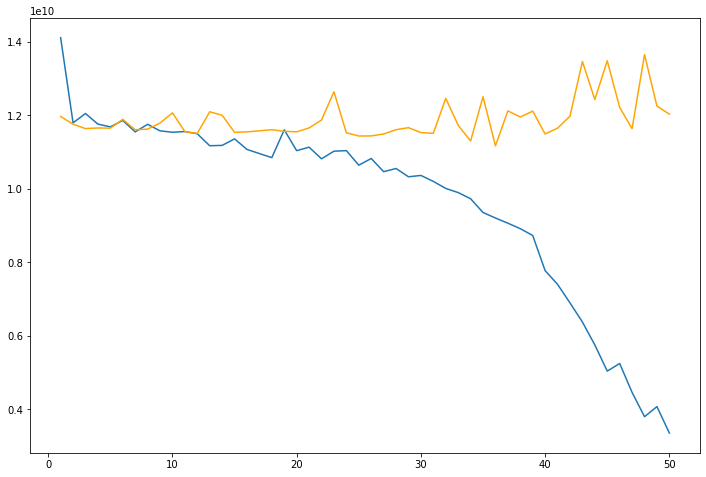

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = history12.history

mae_values = model_dict['mse'] 
val_mae_values = model_dict['val_mse']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE',c="orange")
plt.show()

# Testing without outliers

In [44]:
from scipy import stats

In [71]:
keep_indexes = data.index[np.abs(stats.zscore(data['views']))<3]

In [56]:
keep_indexes

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1250, 1251],
           dtype='int64', length=1234)

In [72]:
o_images = array_images[keep_indexes]

In [57]:
o_df = data['views'].iloc[keep_indexes]

In [73]:
len(o_df)

1234

In [74]:
len(o_images)

1234

In [76]:
X_traino, X_testo, y_traino, y_testo = train_test_split(o_images,o_df,test_size=150,random_state=4521)
X_train_fo,X_valo,y_train_fo,y_valo = train_test_split(X_traino,y_traino,test_size=100,random_state=4521)

In [96]:
# CNN
modelo = models.Sequential()
modelo.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Dropout(rate=0.3))

modelo.add(layers.Conv2D(32, (4, 4), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Dropout(rate=0.3))

modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Dropout(rate=0.3))

modelo.add(layers.Flatten())
modelo.add(layers.Dense(64, activation='relu'))
modelo.add(layers.Dense(1, activation='linear'))

In [97]:
modelo.compile(loss='mse',
              optimizer="adam",
              metrics=['mse'])

In [98]:
historyo = modelo.fit(X_train_fo,
                    y_train_fo,
                    epochs=100,
                    batch_size=10,
                    validation_data=(X_valo, y_valo))

Epoch 1/100
99/99 [==============================] - 29s 297ms/step - loss: 6156743168.0000 - mse: 6156743168.0000 - val_loss: 6483060224.0000 - val_mse: 6483060224.0000
Epoch 2/100
99/99 [==============================] - 30s 301ms/step - loss: 4464182272.0000 - mse: 4464181760.0000 - val_loss: 6003848192.0000 - val_mse: 6003848192.0000
Epoch 3/100
99/99 [==============================] - 29s 289ms/step - loss: 4557289472.0000 - mse: 4557289472.0000 - val_loss: 5800169472.0000 - val_mse: 5800169472.0000
Epoch 4/100
99/99 [==============================] - 28s 287ms/step - loss: 4459104768.0000 - mse: 4459104768.0000 - val_loss: 6725669376.0000 - val_mse: 6725669376.0000
Epoch 5/100
99/99 [==============================] - 28s 279ms/step - loss: 4509523456.0000 - mse: 4509523456.0000 - val_loss: 5798660096.0000 - val_mse: 5798660096.0000
Epoch 6/100
99/99 [==============================] - 28s 279ms/step - loss: 4487494144.0000 - mse: 4487494144.0000 - val_loss: 6563090432.0000 - val_m

Epoch 49/100
99/99 [==============================] - 29s 290ms/step - loss: 3493890560.0000 - mse: 3493890560.0000 - val_loss: 5724689408.0000 - val_mse: 5724688896.0000
Epoch 50/100
99/99 [==============================] - 29s 298ms/step - loss: 3458742272.0000 - mse: 3458742272.0000 - val_loss: 5745157120.0000 - val_mse: 5745157120.0000
Epoch 51/100
99/99 [==============================] - 30s 302ms/step - loss: 3320915968.0000 - mse: 3320915968.0000 - val_loss: 5535494144.0000 - val_mse: 5535494144.0000
Epoch 52/100
99/99 [==============================] - 34s 348ms/step - loss: 3238986240.0000 - mse: 3238986240.0000 - val_loss: 5660091904.0000 - val_mse: 5660091904.0000
Epoch 53/100
99/99 [==============================] - 29s 291ms/step - loss: 3254948096.0000 - mse: 3254948096.0000 - val_loss: 6100153344.0000 - val_mse: 6100153344.0000
Epoch 54/100
99/99 [==============================] - 29s 296ms/step - loss: 3200268032.0000 - mse: 3200268032.0000 - val_loss: 5718720512.0000 -

KeyboardInterrupt: 

In [99]:
# CNN
modelod = models.Sequential()
modelod.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
modelod.add(layers.MaxPooling2D((2, 2)))
modelod.add(layers.Dropout(rate=0.3))

modelod.add(layers.Conv2D(32, (4, 4), activation='relu'))
modelod.add(layers.MaxPooling2D((2, 2)))
modelod.add(layers.Dropout(rate=0.3))

modelod.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelod.add(layers.MaxPooling2D((2, 2)))
modelod.add(layers.Dropout(rate=0.3))

modelod.add(layers.Flatten())
modelod.add(layers.Dense(64, activation='relu'))
modelod.add(layers.Dense(1, activation='linear'))

In [100]:
modelod.compile(loss='mse',
              optimizer="adam",
              metrics=['mse'])

In [101]:
historyod = modelod.fit(X_train_fo,
                    y_train_fo,
                    epochs=50,
                    batch_size=10,
                    validation_data=(X_valo, y_valo))

Epoch 1/50
99/99 [==============================] - 29s 291ms/step - loss: 6276988416.0000 - mse: 6276988416.0000 - val_loss: 7095475200.0000 - val_mse: 7095475200.0000
Epoch 2/50
99/99 [==============================] - 28s 287ms/step - loss: 4660126720.0000 - mse: 4660126720.0000 - val_loss: 6040385536.0000 - val_mse: 6040385536.0000
Epoch 3/50
99/99 [==============================] - 28s 285ms/step - loss: 4469327360.0000 - mse: 4469327360.0000 - val_loss: 5826166784.0000 - val_mse: 5826166784.0000
Epoch 4/50
99/99 [==============================] - 28s 288ms/step - loss: 4407976448.0000 - mse: 4407976448.0000 - val_loss: 5742219264.0000 - val_mse: 5742219264.0000
Epoch 5/50
99/99 [==============================] - 28s 286ms/step - loss: 4495324160.0000 - mse: 4495324160.0000 - val_loss: 6173441536.0000 - val_mse: 6173441536.0000
Epoch 6/50
99/99 [==============================] - 28s 283ms/step - loss: 4351856640.0000 - mse: 4351856640.0000 - val_loss: 6003895296.0000 - val_mse: 60

KeyboardInterrupt: 

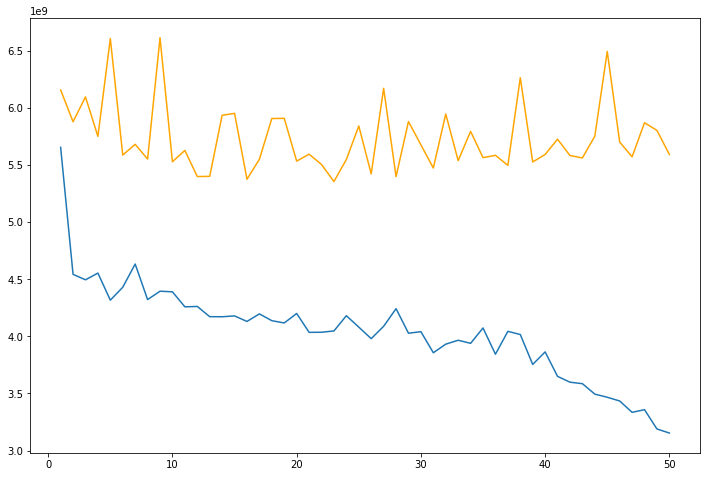

In [102]:
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = historyod.history

mae_values = model_dict['mse'] 
val_mae_values = model_dict['val_mse']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE',c="orange")
plt.show()

In [103]:
# CNN
modeloda = models.Sequential()
modeloda.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
modeloda.add(layers.MaxPooling2D((2, 2)))
modeloda.add(layers.Dropout(rate=0.3))

modeloda.add(layers.Conv2D(32, (4, 4), activation='relu'))
modeloda.add(layers.MaxPooling2D((2, 2)))
modeloda.add(layers.Dropout(rate=0.3))

modeloda.add(layers.Conv2D(64, (3, 3), activation='relu'))
modeloda.add(layers.MaxPooling2D((2, 2)))
modeloda.add(layers.Dropout(rate=0.3))

modeloda.add(layers.Flatten())
modeloda.add(layers.Dense(64, activation='relu'))
modeloda.add(layers.Dense(1, activation='linear'))

In [104]:
modeloda.compile(loss='mae',
              optimizer="adam",
              metrics=['mae'])

In [105]:
historyoda = modeloda.fit(X_train_fo,
                    y_train_fo,
                    epochs=25,
                    batch_size=10,
                    validation_data=(X_valo, y_valo))

Epoch 1/25
99/99 [==============================] - 27s 274ms/step - loss: 56654.5117 - mae: 56654.5117 - val_loss: 59654.4883 - val_mae: 59654.4883
Epoch 2/25
99/99 [==============================] - 27s 271ms/step - loss: 46545.0586 - mae: 46545.0586 - val_loss: 61312.8047 - val_mae: 61312.8047
Epoch 3/25
99/99 [==============================] - 27s 271ms/step - loss: 45657.0977 - mae: 45657.0977 - val_loss: 57649.8086 - val_mae: 57649.8086
Epoch 4/25
99/99 [==============================] - 27s 272ms/step - loss: 45539.5859 - mae: 45539.5820 - val_loss: 56715.0234 - val_mae: 56715.0195
Epoch 5/25
99/99 [==============================] - 27s 271ms/step - loss: 45266.5000 - mae: 45266.5000 - val_loss: 55927.3008 - val_mae: 55927.3008
Epoch 6/25
99/99 [==============================] - 27s 272ms/step - loss: 44511.1055 - mae: 44511.1055 - val_loss: 65864.2578 - val_mae: 65864.2578
Epoch 7/25
99/99 [==============================] - 27s 271ms/step - loss: 44970.9570 - mae: 44970.9570 - 

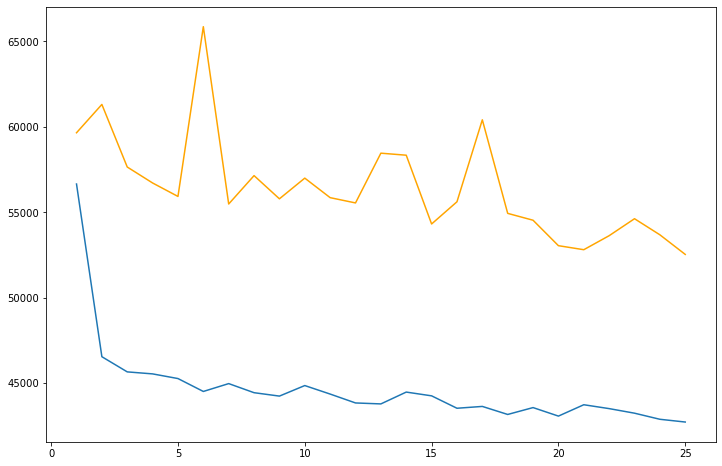

In [106]:
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = historyoda.history

mae_values = model_dict['mae'] 
val_mae_values = model_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE',c="orange")
plt.show()

In [107]:
# CNN
modeloa = models.Sequential()
modeloa.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
modeloa.add(layers.MaxPooling2D((2, 2)))

modeloa.add(layers.Conv2D(32, (4, 4), activation='relu'))
modeloa.add(layers.MaxPooling2D((2, 2)))

modeloa.add(layers.Conv2D(64, (3, 3), activation='relu'))
modeloa.add(layers.MaxPooling2D((2, 2)))

modeloa.add(layers.Flatten())
modeloa.add(layers.Dense(64, activation='relu'))
modeloa.add(layers.Dense(1, activation='linear'))

In [108]:
modeloa.compile(loss='mae',
              optimizer="adam",
              metrics=['mae'])

In [109]:
historyoa = modeloa.fit(X_train_fo,
                    y_train_fo,
                    epochs=25,
                    batch_size=10,
                    validation_data=(X_valo, y_valo))

Epoch 1/25
99/99 [==============================] - 23s 236ms/step - loss: 56513.1953 - mae: 56513.1953 - val_loss: 57284.6016 - val_mae: 57284.6016
Epoch 2/25
99/99 [==============================] - 23s 233ms/step - loss: 47752.6250 - mae: 47752.6250 - val_loss: 57162.6406 - val_mae: 57162.6406
Epoch 3/25
99/99 [==============================] - 23s 232ms/step - loss: 46552.4688 - mae: 46552.4688 - val_loss: 56894.5703 - val_mae: 56894.5703
Epoch 4/25
99/99 [==============================] - 23s 232ms/step - loss: 46062.7305 - mae: 46062.7305 - val_loss: 58078.6992 - val_mae: 58078.6992
Epoch 5/25
99/99 [==============================] - 23s 233ms/step - loss: 45501.5781 - mae: 45501.5781 - val_loss: 55489.6836 - val_mae: 55489.6836
Epoch 6/25
99/99 [==============================] - 23s 233ms/step - loss: 45914.9883 - mae: 45914.9883 - val_loss: 55068.4961 - val_mae: 55068.4961
Epoch 7/25
99/99 [==============================] - 23s 233ms/step - loss: 45100.9883 - mae: 45100.9883 - 

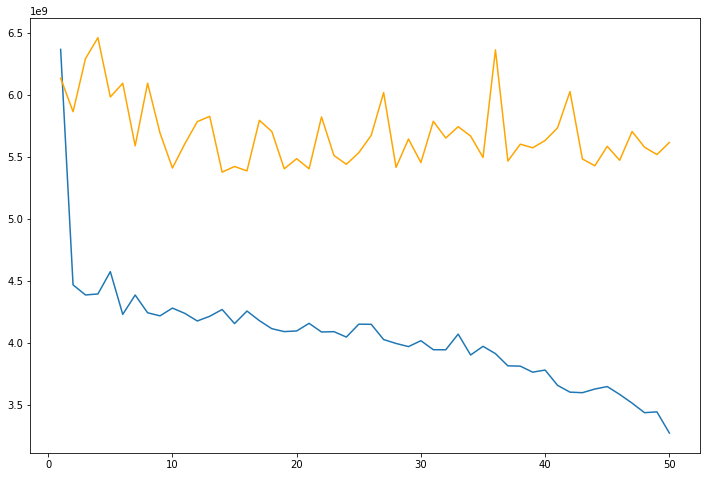

In [110]:
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = historyo.history

mae_values = model_dict['mse'] 
val_mae_values = model_dict['val_mse']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE',c="orange")
plt.show()

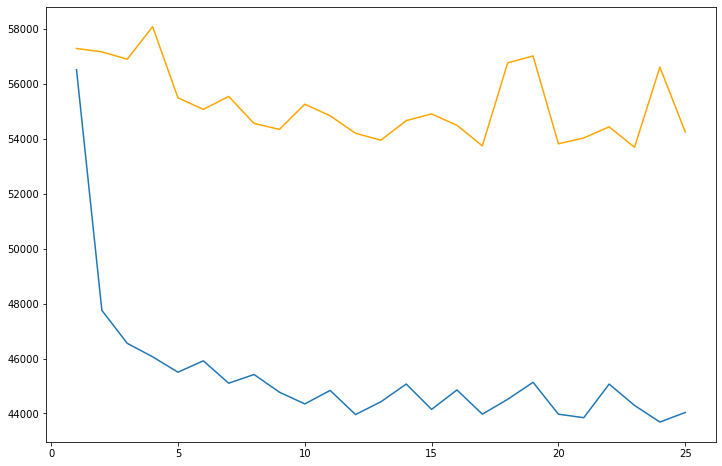

In [111]:
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = historyoa.history

mae_values = model_dict['mae'] 
val_mae_values = model_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE',c="orange")
plt.show()

In [120]:
y.describe()

count    1.252000e+03
mean     1.076146e+05
std      1.043938e+05
min      8.088000e+03
25%      5.404000e+04
50%      8.179300e+04
75%      1.292045e+05
max      1.783323e+06
Name: views, dtype: float64

In [122]:
print(round(y.describe(),2))

count       1252.00
mean      107614.62
std       104393.78
min         8088.00
25%        54040.00
50%        81793.00
75%       129204.50
max      1783323.00
Name: views, dtype: float64


In [140]:
measures = y.describe()
def to_cats(view, measures):
    q25 = measures['25%']
    q50 = measures['50%']
    q75 = measures['75%']
    if view <= q25:
        return 1
    if view <= q50:
        return 2
    if view <= q75:
        return 3
    if view > q75:
        return 4
    

In [141]:
cats = y.apply(lambda x: to_cats(x,measures))

In [142]:
cats

0       1
1       2
2       1
3       2
4       2
       ..
1247    4
1248    4
1249    4
1250    2
1251    4
Name: views, Length: 1252, dtype: int64

In [143]:
lb = LabelBinarizer()
lb.fit(y_train_f)

y_train_lb = to_categorical(lb.transform(y_train_f))[:,:,1]
y_val_lb = to_categorical(lb.transform(y_val))[:,:,1]
y_test_lb = to_categorical(lb.transform(y_test))[:,:,1]

In [145]:
y_train_lb

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [135]:
# cats = cats.apply(lambda x: str(x))

In [136]:
X_train, X_test, y_train, y_test = train_test_split(array_images,cats,test_size=150,random_state=4521)
X_train_f,X_val,y_train_f,y_val = train_test_split(X_train,y_train,test_size=100,random_state=4521)

In [137]:
y_train_f

1031    2
210     4
180     2
562     4
293     3
       ..
258     1
1084    3
724     4
1202    4
872     3
Name: views, Length: 1002, dtype: object

In [148]:
# CNN
modelcat = models.Sequential()
modelcat.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
modelcat.add(layers.MaxPooling2D((2, 2)))

modelcat.add(layers.Conv2D(32, (4, 4), activation='relu'))
modelcat.add(layers.MaxPooling2D((2, 2)))

modelcat.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelcat.add(layers.MaxPooling2D((2, 2)))

modelcat.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelcat.add(layers.MaxPooling2D((2, 2)))

modelcat.add(layers.Flatten())
modelcat.add(layers.Dense(64, activation='relu'))
modelcat.add(layers.Dense(4, activation='softmax'))


modelcat.compile(loss='categorical_crossentropy',
              optimizer="SGD",
              metrics=['acc'])

historycat = modelcat.fit(X_train_f,
                          y_train_lb,
                          epochs=25,
                          batch_size=10,
                          validation_data=(X_val, y_val_lb))

Epoch 1/25
101/101 [==============================] - 26s 258ms/step - loss: 1.3904 - acc: 0.2615 - val_loss: 1.3796 - val_acc: 0.2800
Epoch 2/25
101/101 [==============================] - 27s 263ms/step - loss: 1.3832 - acc: 0.2794 - val_loss: 1.3794 - val_acc: 0.2700
Epoch 3/25
101/101 [==============================] - 26s 257ms/step - loss: 1.3755 - acc: 0.3054 - val_loss: 1.3760 - val_acc: 0.3900
Epoch 4/25
101/101 [==============================] - 27s 265ms/step - loss: 1.3664 - acc: 0.3333 - val_loss: 1.3593 - val_acc: 0.3000
Epoch 5/25
101/101 [==============================] - 27s 264ms/step - loss: 1.3548 - acc: 0.3413 - val_loss: 1.3551 - val_acc: 0.3500
Epoch 6/25
101/101 [==============================] - 27s 264ms/step - loss: 1.3414 - acc: 0.3513 - val_loss: 1.3566 - val_acc: 0.3100
Epoch 7/25
101/101 [==============================] - 30s 298ms/step - loss: 1.3226 - acc: 0.3673 - val_loss: 1.3417 - val_acc: 0.4000
Epoch 8/25
101/101 [==============================] - 3

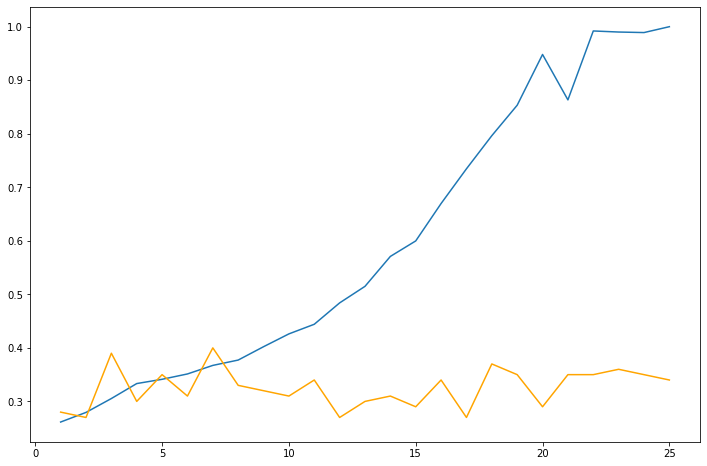

In [149]:
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = historycat.history

mae_values = model_dict['acc'] 
val_mae_values = model_dict['val_acc']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE',c="orange")
plt.show()

In [150]:
modelcat2 = models.Sequential()
modelcat2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
modelcat2.add(layers.MaxPooling2D((2, 2)))

modelcat2.add(layers.Conv2D(32, (4, 4), activation='relu'))
modelcat2.add(layers.MaxPooling2D((2, 2)))

modelcat2.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelcat2.add(layers.MaxPooling2D((2, 2)))

modelcat2.add(layers.Flatten())
modelcat2.add(layers.Dense(64, activation='relu'))
modelcat2.add(layers.Dense(4, activation='softmax'))

modelcat2.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

historycat2 = modelcat2.fit(X_train_f,
                          y_train_lb,
                          epochs=25,
                          batch_size=10,
                          validation_data=(X_val, y_val_lb))

Epoch 1/25
101/101 [==============================] - 25s 246ms/step - loss: 1.4376 - acc: 0.2685 - val_loss: 1.3880 - val_acc: 0.2100
Epoch 2/25
101/101 [==============================] - 25s 247ms/step - loss: 1.3534 - acc: 0.3283 - val_loss: 1.3695 - val_acc: 0.2500
Epoch 3/25
101/101 [==============================] - 25s 246ms/step - loss: 1.2580 - acc: 0.4301 - val_loss: 1.3410 - val_acc: 0.3900
Epoch 4/25
101/101 [==============================] - 25s 246ms/step - loss: 0.9597 - acc: 0.5968 - val_loss: 1.5888 - val_acc: 0.3500
Epoch 5/25
101/101 [==============================] - 24s 242ms/step - loss: 0.5241 - acc: 0.8034 - val_loss: 2.1819 - val_acc: 0.3900
Epoch 6/25
101/101 [==============================] - 25s 245ms/step - loss: 0.2192 - acc: 0.9351 - val_loss: 3.6275 - val_acc: 0.4100
Epoch 7/25
101/101 [==============================] - 25s 245ms/step - loss: 0.0686 - acc: 0.9800 - val_loss: 5.1288 - val_acc: 0.3700
Epoch 8/25
101/101 [==============================] - 2

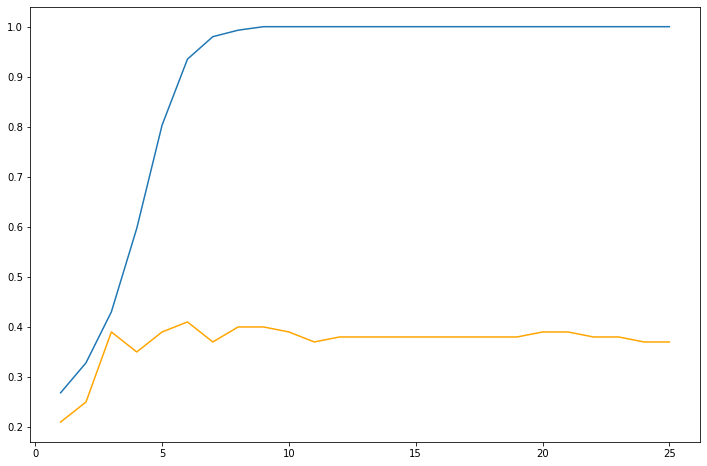

In [151]:
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = historycat2.history

mae_values = model_dict['acc'] 
val_mae_values = model_dict['val_acc']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE',c="orange")
plt.show()

In [152]:
modelcat3 = models.Sequential()
modelcat3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
modelcat3.add(layers.MaxPooling2D((2, 2)))

modelcat3.add(layers.Conv2D(32, (4, 4), activation='relu'))
modelcat3.add(layers.MaxPooling2D((2, 2)))
modelcat3.add(layers.Dropout(rate=0.3))

modelcat3.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelcat3.add(layers.MaxPooling2D((2, 2)))
modelcat3.add(layers.Dropout(rate=0.3))

modelcat3.add(layers.Flatten())
modelcat3.add(layers.Dense(64, activation='relu'))
modelcat3.add(layers.Dense(4, activation='softmax'))

modelcat3.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

historycat3 = modelcat3.fit(X_train_f,
                          y_train_lb,
                          epochs=25,
                          batch_size=10,
                          validation_data=(X_val, y_val_lb))

Epoch 1/25
101/101 [==============================] - 26s 253ms/step - loss: 1.4821 - acc: 0.2575 - val_loss: 1.3864 - val_acc: 0.2200
Epoch 2/25
101/101 [==============================] - 26s 254ms/step - loss: 1.3876 - acc: 0.2695 - val_loss: 1.3864 - val_acc: 0.2200
Epoch 3/25
101/101 [==============================] - 25s 250ms/step - loss: 1.3869 - acc: 0.2525 - val_loss: 1.3855 - val_acc: 0.3500
Epoch 4/25
101/101 [==============================] - 25s 249ms/step - loss: 1.3817 - acc: 0.3034 - val_loss: 1.3590 - val_acc: 0.2900
Epoch 5/25
101/101 [==============================] - 25s 249ms/step - loss: 1.3487 - acc: 0.3443 - val_loss: 1.3323 - val_acc: 0.3000
Epoch 6/25
101/101 [==============================] - 25s 250ms/step - loss: 1.2619 - acc: 0.4092 - val_loss: 1.3226 - val_acc: 0.3300
Epoch 7/25
101/101 [==============================] - 25s 252ms/step - loss: 1.1682 - acc: 0.4910 - val_loss: 1.3546 - val_acc: 0.3300
Epoch 8/25
101/101 [==============================] - 2

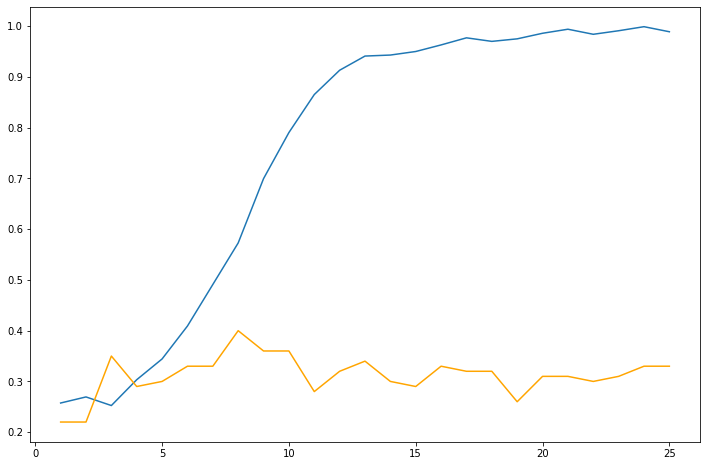

In [153]:
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = historycat3.history

mae_values = model_dict['acc'] 
val_mae_values = model_dict['val_acc']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE',c="orange")
plt.show()

In [154]:
# CNN
modelcat4 = models.Sequential()
modelcat4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180,320,3)))
modelcat4.add(layers.MaxPooling2D((2, 2)))

modelcat4.add(layers.Conv2D(32, (4, 4), activation='relu'))
modelcat4.add(layers.MaxPooling2D((2, 2)))

modelcat4.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelcat4.add(layers.MaxPooling2D((2, 2)))

modelcat4.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelcat4.add(layers.MaxPooling2D((2, 2)))

modelcat4.add(layers.Flatten())
modelcat4.add(layers.Dense(64, activation='relu'))
modelcat4.add(layers.Dense(4, activation='softmax'))


modelcat4.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

historycat4 = modelcat4.fit(X_train_f,
                          y_train_lb,
                          epochs=25,
                          batch_size=10,
                          validation_data=(X_val, y_val_lb))

Epoch 1/25
101/101 [==============================] - 26s 254ms/step - loss: 1.3948 - acc: 0.2445 - val_loss: 1.3865 - val_acc: 0.2700
Epoch 2/25
101/101 [==============================] - 26s 255ms/step - loss: 1.3870 - acc: 0.2565 - val_loss: 1.3880 - val_acc: 0.2200
Epoch 3/25
101/101 [==============================] - 25s 252ms/step - loss: 1.3819 - acc: 0.2854 - val_loss: 1.3663 - val_acc: 0.2700
Epoch 4/25
101/101 [==============================] - 25s 248ms/step - loss: 1.3523 - acc: 0.3204 - val_loss: 1.3595 - val_acc: 0.3400
Epoch 5/25
101/101 [==============================] - 25s 246ms/step - loss: 1.3262 - acc: 0.3533 - val_loss: 1.3487 - val_acc: 0.3200
Epoch 6/25
101/101 [==============================] - 25s 244ms/step - loss: 1.3089 - acc: 0.3373 - val_loss: 1.3521 - val_acc: 0.3600
Epoch 7/25
101/101 [==============================] - 25s 248ms/step - loss: 1.2404 - acc: 0.4291 - val_loss: 1.4105 - val_acc: 0.3100
Epoch 8/25
101/101 [==============================] - 2

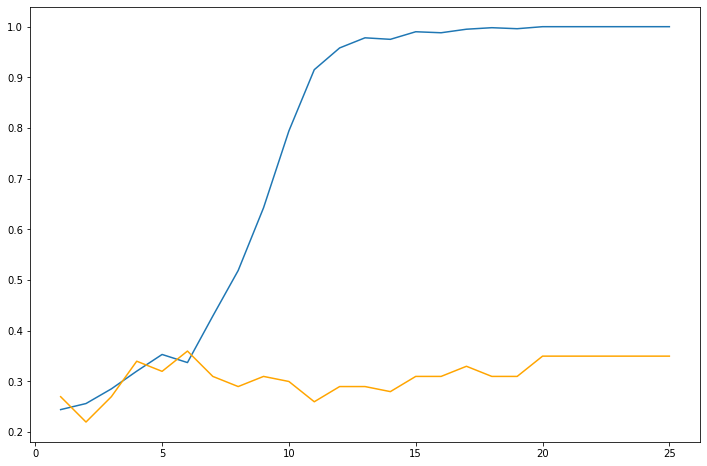

In [155]:
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = historycat4.history

mae_values = model_dict['acc'] 
val_mae_values = model_dict['val_acc']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE',c="orange")
plt.show()

# Using IQR

In [204]:
# Load all images into a container
images_data_resize = []
for vid in video_ids:
    image_name = r"Images/"+vid+".png"
    current_image = np.resize(image.imread(image_name,format="jpeg"),new_shape=(90,160,3))
    images_data_resize.append(np.asarray(current_image))
# Scaling the image data and converting into array
array_images_resized = np.array(images_data_resize)/255

In [205]:
180/2,320/2

(90.0, 160.0)

In [206]:
array_images_resized.shape

(1252, 90, 160, 3)

In [207]:
iqr = 72914.75
upp_lim = 236707.875

In [208]:
X_trainree, X_testree, y_trainree, y_testree = train_test_split(array_images_resized,y,test_size=150,random_state=4521)
X_train_free,X_valree,y_train_free,y_valree = train_test_split(X_trainree,y_trainree,test_size=100,random_state=4521)

In [209]:
# CNN
modelree = models.Sequential()
modelree.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(90,160,3)))
modelree.add(layers.MaxPooling2D((2, 2)))

modelree.add(layers.Conv2D(32, (4, 4), activation='relu'))
modelree.add(layers.MaxPooling2D((2, 2)))

modelree.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelree.add(layers.MaxPooling2D((2, 2)))

modelree.add(layers.Flatten())
modelree.add(layers.Dense(64, activation='relu'))
modelree.add(layers.Dense(1, activation='linear'))

modelree.compile(loss='mae',
              optimizer="adam",
              metrics=['mae'])


In [210]:
modelree.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_104 (Conv2D)          (None, 88, 158, 32)       896       
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 44, 79, 32)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 41, 76, 32)        16416     
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 20, 38, 32)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 18, 36, 64)        18496     
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 9, 18, 64)         0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 10368)           

In [211]:
X_train_free[0]

array([[[0.        , 0.        , 0.        ],
        [0.02352941, 0.02352941, 0.02352941],
        [0.04313725, 0.04313725, 0.04313725],
        ...,
        [0.05882353, 0.02745098, 0.01960784],
        [0.03137255, 0.        , 0.        ],
        [0.05882353, 0.01960784, 0.01568627]],

       [[0.09411765, 0.0627451 , 0.05098039],
        [0.09803922, 0.06666667, 0.05490196],
        [0.09803922, 0.07843137, 0.0627451 ],
        ...,
        [0.25882353, 0.36862745, 0.4627451 ],
        [0.2627451 , 0.37254902, 0.46666667],
        [0.2627451 , 0.37254902, 0.46666667]],

       [[0.02352941, 0.02352941, 0.02352941],
        [0.        , 0.        , 0.        ],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.04313725, 0.01176471, 0.00392157],
        [0.09019608, 0.05882353, 0.05098039],
        [0.02352941, 0.        , 0.        ]],

       ...,

       [[0.43529412, 0.04705882, 0.02352941],
        [0.43529412, 0.04705882, 0.02352941],
        [0.43137255, 0

In [212]:
historyree = modelree.fit(X_train_free,
                        y_train_free,
                        epochs=50,
                        batch_size=10,
                        validation_data=(X_valree, y_valree))

Epoch 1/50
101/101 [==============================] - 6s 62ms/step - loss: 67454.2656 - mae: 67454.2656 - val_loss: 57159.7344 - val_mae: 57159.7344
Epoch 2/50
101/101 [==============================] - 7s 66ms/step - loss: 56902.1133 - mae: 56902.1133 - val_loss: 55615.5352 - val_mae: 55615.5352
Epoch 3/50
101/101 [==============================] - 6s 61ms/step - loss: 56185.7852 - mae: 56185.7852 - val_loss: 56771.9336 - val_mae: 56771.9336
Epoch 4/50
101/101 [==============================] - 6s 61ms/step - loss: 55929.2578 - mae: 55929.2617 - val_loss: 58147.6914 - val_mae: 58147.6914
Epoch 5/50
101/101 [==============================] - 6s 61ms/step - loss: 56071.9258 - mae: 56071.9258 - val_loss: 55325.1016 - val_mae: 55325.1016
Epoch 6/50
101/101 [==============================] - 6s 62ms/step - loss: 56407.0469 - mae: 56407.0469 - val_loss: 55236.0781 - val_mae: 55236.0781
Epoch 7/50
101/101 [==============================] - 7s 65ms/step - loss: 55903.5664 - mae: 55903.5664 - 

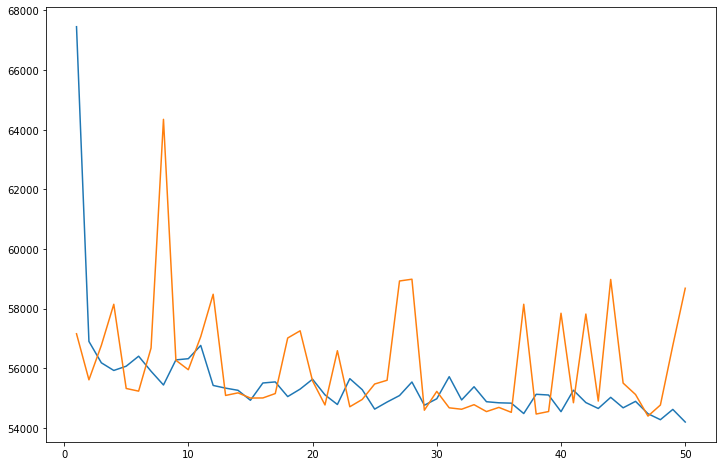

In [213]:
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = historyree.history

mae_values = model_dict['mae'] 
val_mae_values = model_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE')
plt.show()